# I Selenium


## Dependencies

Install chromium

```bash
sudo apt update
sudo apt install chromium chromium-driver
```


In [7]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.chrome.options import Options as ChromeOptions
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from webdriver_manager.core.os_manager import ChromeType

options = ChromeOptions()
# Comment out the line below to see the browser window (remove headless mode)
# options.add_argument("--headless=new")  # Run in background without GUI
options.add_argument("--no-sandbox")
options.add_argument("--disable-dev-shm-usage")

# Let webdriver-manager find Chromium automatically
driver = webdriver.Chrome(service=Service(ChromeDriverManager(chrome_type=ChromeType.CHROMIUM).install()), options=options)

In [9]:
driver.get("https://www.ebay.com/")

## Options to locate elements

Visit the Selenium documentation to discover various ways to locate elements (such as by ID, CSS selector, class name, tag name, XPath, etc.).

<https://selenium-python.readthedocs.io/locating-elements.html>


In [11]:
search_box = driver.find_element(By.ID, "gh-ac")
search_box

<selenium.webdriver.remote.webelement.WebElement (session="d68fe8e5b2a7a4149e794e6f47fac07f", element="f.27F992A9192E2AF668585195ED45C3A9.d.322CD6AB7ED8AB90D22C03C40DBA9D65.e.39")>

In [13]:
print(search_box.get_attribute("outerHTML"))

<input data-marko="{&quot;oninput&quot;:&quot;handleTextUpdate s0-1-4-12-4 false&quot;,&quot;onfocusin&quot;:&quot;handleMarkTimer s0-1-4-12-4 false&quot;,&quot;onkeydown&quot;:&quot;handleMarkTimer s0-1-4-12-4 false&quot;}" data-marko-key="@input s0-1-4-12-4" id="gh-ac" class="gh-search-input gh-tb ui-autocomplete-input" title="Search" type="text" placeholder="Search for anything" aria-autocomplete="list" aria-expanded="false" size="50" maxlength="300" aria-label="Search for anything" name="_nkw" autocapitalize="off" autocorrect="off" spellcheck="false" autocomplete="off" aria-haspopup="true" role="combobox" tabindex="4" aria-controls="ebay-autocomplete">


In [14]:
search_box.click()  # Not really needed, just for testing purposes

In [15]:
search_box.send_keys("galaxy s25")

In [17]:
submit_button = driver.find_element(By.ID, "gh-search-btn")
submit_button.click()

In [18]:
result_container = driver.find_element(By.CSS_SELECTOR, "ul.srp-results.srp-list.clearfix")
result_container

<selenium.webdriver.remote.webelement.WebElement (session="d68fe8e5b2a7a4149e794e6f47fac07f", element="f.27F992A9192E2AF668585195ED45C3A9.d.FD0C357CDD13FF7F9F8F5FC3A1F3C356.e.9416")>

In [24]:
# list_items = driver.find_elements(By.XPATH, "//*[@data-component-type='s-search-result']")
# print(f"Found {len(list_items)} items.")

# list_items = driver.find_elements(By.XPATH, "//*[contains(@class, 'puisg-row')]")

# list_items = driver.find_elements(By.XPATH, "//*[contains(@data-cy, 'title-recipe')]")

# list_items = driver.find_elements(By.CSS_SELECTOR, ".a-section.a-spacing-small.a-spacing-top-small")

# list_items = result_container.find_elements(By.TAG_NAME, "li")
# print(f"Found {len(list_items)} items.")

In [23]:
list_items = result_container.find_elements(By.CSS_SELECTOR, "li.s-card")
print(f"Found {len(list_items)} items.")

Found 60 items.


In [25]:
print(list_items[0])

<selenium.webdriver.remote.webelement.WebElement (session="d68fe8e5b2a7a4149e794e6f47fac07f", element="f.27F992A9192E2AF668585195ED45C3A9.d.FD0C357CDD13FF7F9F8F5FC3A1F3C356.e.9417")>


![](./img/10/li.png)


In [26]:
# The raw element we will get the data from
from bs4 import BeautifulSoup

html_content = list_items[0].get_attribute("outerHTML")
soup = BeautifulSoup(html_content, "html.parser")
print(soup.prettify())

<li class="s-card s-card--horizontal s-card--dark-solt-links-blue" data-listingid="167927485916" data-view="mi:1686|iid:1" data-viewport='{"trackableId":"01KB2J9WG5CW9HDNGKZM5GM3X7"}' id="item27194215dc">
 <div class="su-card-container su-card-container--horizontal">
  <div class="su-card-container__media">
   <div class="s-card__media-wrapper">
    <div class="su-media su-media--image">
     <div class="su-media__primary">
      <div class="su-media__image">
       <a _sp="p2351460.m1686.l7400" class="s-card__link image-treatment" data-interactions='[{"actionKind":"NAVSRC","interaction":"wwFVrK2vRE0lhQY0MDFLQjJKOVdIOTUxSk1UNFpCOEpIUDlBWFo0MDFLQjJKOVdITUNZNlgzVDlaUUo4OEhYVlE0MDFLQjJKOVdHNUNXOUhETkdLWk01R00zWDcAAAg3NDAwDE5BVlNSQwA="}]' data-s-1c3x832='{"eventFamily":"LST","eventAction":"ACTN","actionKind":"NAVSRC","actionKinds":["NAVSRC"],"operationId":"2351460","flushImmediately":false,"eventProperty":{"$l":"2314906999558475"}}' href="https://www.ebay.com/itm/167927485916?_skw=galaxy+s

In [31]:
# Title

# The dot (.) in a CSS selector means "class", so .su-styled-text selects elements with class "su-styled-text".
# When a selector starts with "span.su-styled-text.primary.default", it means:
# find a <span> tag that has all three classes: su-styled-text, primary, and default.
# In other words, the . does not make span part of the class,
# but rather says: 'find a <span> with all those classes.'
list_items[0].find_element(By.CSS_SELECTOR, "span.su-styled-text.primary.default").text

'Galaxy S25 FE'

In [35]:
# Price
list_items[0].find_element(By.CSS_SELECTOR, "span.su-styled-text.primary.bold.large-1.s-card__price").text

'$360.00'

In [36]:
# Link
list_items[0].find_element(By.XPATH, ".//div[contains(@class, 'su-media__image')]/a").get_attribute("outerHTML")

'<a class="s-card__link image-treatment" href="https://www.ebay.com/itm/167927485916?_skw=galaxy+s25&amp;epid=16085673539&amp;itmmeta=01KB2J9WG5CW9HDNGKZM5GM3X7&amp;hash=item27194215dc:g:9WUAAeSwfI1pFpY-&amp;itmprp=enc%3AAQAKAAAA4FkggFvd1GGDu0w3yXCmi1eBARZmwpsdwX2AcUTVyJ22%2BwkIo2qW1iEsAXh9R5e%2BRPi8x6RVYmi8MPuDSia17prMIETVKyvMSc4yNDwT%2B%2BkxKkRcOLoarqxY6uEGF1xgzBR4EfYeY2ldLNVA7TFA1z%2Fde0tcj09921%2BM%2FiOxWqb4vYl%2B7fIxZE5Bqj6fikob0DpsIlK12tz6b6JNqx3nkhdqurVD5F9obYOwixDklKzG%2B%2B%2BiDaDB3PZwWeL4J1drc8EPyBoliKzEhIWTbgcpGrdcNbqvn5KvRLy%2FS3OMaGs8%7Ctkp%3ABFBMmMin0thm" _sp="p2351460.m1686.l7400" data-interactions="[{&quot;actionKind&quot;:&quot;NAVSRC&quot;,&quot;interaction&quot;:&quot;wwFVrK2vRE0lhQY0MDFLQjJKOVdIOTUxSk1UNFpCOEpIUDlBWFo0MDFLQjJKOVdITUNZNlgzVDlaUUo4OEhYVlE0MDFLQjJKOVdHNUNXOUhETkdLWk01R00zWDcAAAg3NDAwDE5BVlNSQwA=&quot;}]" data-s-1c3x832="{&quot;eventFamily&quot;:&quot;LST&quot;,&quot;eventAction&quot;:&quot;ACTN&quot;,&quot;actionKind&quot;:&quot;NAVSRC&quot;,&quot;acti

In [44]:
a_element = list_items[0].find_element(By.CSS_SELECTOR, "a.s-card__link")
# a_element.get_attribute("outerHTML")
a_element.get_attribute("href")

'https://www.ebay.com/itm/167927485916?_skw=galaxy+s25&epid=16085673539&itmmeta=01KB2J9WG5CW9HDNGKZM5GM3X7&hash=item27194215dc:g:9WUAAeSwfI1pFpY-&itmprp=enc%3AAQAKAAAA4FkggFvd1GGDu0w3yXCmi1eBARZmwpsdwX2AcUTVyJ22%2BwkIo2qW1iEsAXh9R5e%2BRPi8x6RVYmi8MPuDSia17prMIETVKyvMSc4yNDwT%2B%2BkxKkRcOLoarqxY6uEGF1xgzBR4EfYeY2ldLNVA7TFA1z%2Fde0tcj09921%2BM%2FiOxWqb4vYl%2B7fIxZE5Bqj6fikob0DpsIlK12tz6b6JNqx3nkhdqurVD5F9obYOwixDklKzG%2B%2B%2BiDaDB3PZwWeL4J1drc8EPyBoliKzEhIWTbgcpGrdcNbqvn5KvRLy%2FS3OMaGs8%7Ctkp%3ABFBMmMin0thm'

In [45]:
link = list_items[0].find_element(By.CSS_SELECTOR, "a.s-card__link").get_attribute("href")
link

'https://www.ebay.com/itm/167927485916?_skw=galaxy+s25&epid=16085673539&itmmeta=01KB2J9WG5CW9HDNGKZM5GM3X7&hash=item27194215dc:g:9WUAAeSwfI1pFpY-&itmprp=enc%3AAQAKAAAA4FkggFvd1GGDu0w3yXCmi1eBARZmwpsdwX2AcUTVyJ22%2BwkIo2qW1iEsAXh9R5e%2BRPi8x6RVYmi8MPuDSia17prMIETVKyvMSc4yNDwT%2B%2BkxKkRcOLoarqxY6uEGF1xgzBR4EfYeY2ldLNVA7TFA1z%2Fde0tcj09921%2BM%2FiOxWqb4vYl%2B7fIxZE5Bqj6fikob0DpsIlK12tz6b6JNqx3nkhdqurVD5F9obYOwixDklKzG%2B%2B%2BiDaDB3PZwWeL4J1drc8EPyBoliKzEhIWTbgcpGrdcNbqvn5KvRLy%2FS3OMaGs8%7Ctkp%3ABFBMmMin0thm'

In [46]:
list_items[0].find_element(By.XPATH, ".//div[contains(@class, 'su-media__image')]/a").get_attribute("href")

'https://www.ebay.com/itm/167927485916?_skw=galaxy+s25&epid=16085673539&itmmeta=01KB2J9WG5CW9HDNGKZM5GM3X7&hash=item27194215dc:g:9WUAAeSwfI1pFpY-&itmprp=enc%3AAQAKAAAA4FkggFvd1GGDu0w3yXCmi1eBARZmwpsdwX2AcUTVyJ22%2BwkIo2qW1iEsAXh9R5e%2BRPi8x6RVYmi8MPuDSia17prMIETVKyvMSc4yNDwT%2B%2BkxKkRcOLoarqxY6uEGF1xgzBR4EfYeY2ldLNVA7TFA1z%2Fde0tcj09921%2BM%2FiOxWqb4vYl%2B7fIxZE5Bqj6fikob0DpsIlK12tz6b6JNqx3nkhdqurVD5F9obYOwixDklKzG%2B%2B%2BiDaDB3PZwWeL4J1drc8EPyBoliKzEhIWTbgcpGrdcNbqvn5KvRLy%2FS3OMaGs8%7Ctkp%3ABFBMmMin0thm'

In [48]:
type(list_items[0])

selenium.webdriver.remote.webelement.WebElement

In [52]:
# Let's wrap it all in a function
from selenium.webdriver.remote.webelement import WebElement


def get_item_data(item: WebElement) -> dict[str, str | None]:
    return {
        "title": item.find_element(By.CSS_SELECTOR, "span.su-styled-text.primary.default").text,
        "price": item.find_element(By.CSS_SELECTOR, "span.s-card__price").text,
        "link": item.find_element(By.CSS_SELECTOR, "a.s-card__link").get_attribute("href"),
    }


result = get_item_data(list_items[0])
result

{'title': 'Galaxy S25 FE',
 'price': '$360.00',
 'link': 'https://www.ebay.com/itm/167927485916?_skw=galaxy+s25&epid=16085673539&itmmeta=01KB2J9WG5CW9HDNGKZM5GM3X7&hash=item27194215dc:g:9WUAAeSwfI1pFpY-&itmprp=enc%3AAQAKAAAA4FkggFvd1GGDu0w3yXCmi1eBARZmwpsdwX2AcUTVyJ22%2BwkIo2qW1iEsAXh9R5e%2BRPi8x6RVYmi8MPuDSia17prMIETVKyvMSc4yNDwT%2B%2BkxKkRcOLoarqxY6uEGF1xgzBR4EfYeY2ldLNVA7TFA1z%2Fde0tcj09921%2BM%2FiOxWqb4vYl%2B7fIxZE5Bqj6fikob0DpsIlK12tz6b6JNqx3nkhdqurVD5F9obYOwixDklKzG%2B%2B%2BiDaDB3PZwWeL4J1drc8EPyBoliKzEhIWTbgcpGrdcNbqvn5KvRLy%2FS3OMaGs8%7Ctkp%3ABFBMmMin0thm'}

In [55]:
a = ['foo', 'bar', 'etc']

ix = 0
for item in a:
    print(ix, item)
    ix +=1

0 foo
1 bar
2 etc


In [56]:
a = ['foo', 'bar', 'etc']

for ix, item in enumerate(a):
    print(ix, item)

0 foo
1 bar
2 etc


In [57]:
data = []

for ix, item in enumerate(list_items):
    try:
        data.append(get_item_data(item))
    except Exception as e:
        print(f"Error getting data for item {ix}: {e}")

data

[{'title': 'Galaxy S25 FE',
  'price': '$360.00',
  'link': 'https://www.ebay.com/itm/167927485916?_skw=galaxy+s25&epid=16085673539&itmmeta=01KB2J9WG5CW9HDNGKZM5GM3X7&hash=item27194215dc:g:9WUAAeSwfI1pFpY-&itmprp=enc%3AAQAKAAAA4FkggFvd1GGDu0w3yXCmi1eBARZmwpsdwX2AcUTVyJ22%2BwkIo2qW1iEsAXh9R5e%2BRPi8x6RVYmi8MPuDSia17prMIETVKyvMSc4yNDwT%2B%2BkxKkRcOLoarqxY6uEGF1xgzBR4EfYeY2ldLNVA7TFA1z%2Fde0tcj09921%2BM%2FiOxWqb4vYl%2B7fIxZE5Bqj6fikob0DpsIlK12tz6b6JNqx3nkhdqurVD5F9obYOwixDklKzG%2B%2B%2BiDaDB3PZwWeL4J1drc8EPyBoliKzEhIWTbgcpGrdcNbqvn5KvRLy%2FS3OMaGs8%7Ctkp%3ABFBMmMin0thm'},
 {'title': 'Samsung Galaxy S25 SM-S931U1 - 128GB - Navy (Carrier Unlocked)',
  'price': '$449.98',
  'link': 'https://www.ebay.com/itm/157247319124?_skw=galaxy+s25&epid=28074871612&itmmeta=01KB2J9WG5QBY87F9H56AA5ZVH&hash=item249cabac54:g:E1kAAeSw9QNon6f~&itmprp=enc%3AAQAKAAAA4FkggFvd1GGDu0w3yXCmi1ejCklXjZRiohjtU6ZULXP834DDuTcUlw5fQCJGpmFfQ0qOf5j%2BsLIOZaxHhi7TBEQyLKFnyo20xqEACBLD04rUImwGp3%2F6GvQ25vj76TR6ndIMlAFCyUJ5xEyP

In [58]:
import pandas as pd

df = pd.DataFrame(data)
df

,title,price,link
0,Galaxy S25 FE,$360.00,https://www.ebay.com/itm/167927485916?_skw=gal...
1,Samsung Galaxy S25 SM-S931U1 - 128GB - Navy (C...,$449.98,https://www.ebay.com/itm/157247319124?_skw=gal...
2,REFURBISHED Samsung Galaxy S25 Unlocked NAVY B...,$399.00,https://www.ebay.com/itm/116784450559?_skw=gal...
3,"S25 Ultra 5G Smartphone 7.3"" Factory Unlocked ...",$56.99,https://www.ebay.com/itm/306160594506?_skw=gal...
4,"Samsung Galaxy S25 Edge 256GB (AT&T) 6.7"" SM-S...",$399.99,https://www.ebay.com/itm/326883875969?_skw=gal...
5,Samsung Galaxy S25 Edge 512GB Titanium Jetblac...,$509.99,https://www.ebay.com/itm/286726163179?_skw=gal...
6,✨ NEW IN BOX Samsung Galaxy S25 5G 128GB IcyBl...,$599.00,https://www.ebay.com/itm/187753501882?_skw=gal...
7,Samsung Galaxy S25 Edge 512GB - Titanium Jet B...,$599.99,https://www.ebay.com/itm/205623408557?_skw=gal...
8,OPEN BOX Samsung Galaxy S25 128GB 256GB SM-S93...,$479.00,https://www.ebay.com/itm/127096191977?_skw=gal...
9,Samsung Galaxy S25 SM-S931U Unlocked 128GB Sil...,$399.99,https://www.ebay.com/itm/177227649020?_skw=gal...


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   60 non-null     object
 1   price   60 non-null     object
 2   link    60 non-null     object
dtypes: object(3)
memory usage: 1.5+ KB


In [60]:
df["price"] = df["price"].str.replace("$", "")
df.price = df.price.str.replace(",", "")
df.price = df.price.astype(float)
df.sort_values(by="price", ascending=False, inplace=True)
df

,title,price,link
43,SEALED Mint Samsung Galaxy S25 Plus 256GB Unlo...,769.95,https://www.ebay.com/itm/157455592302?_skw=gal...
16,Carrier Unlocked Samsung Galaxy S25 Ultra 256G...,750.99,https://www.ebay.com/itm/277496972927?_skw=gal...
54,"Samsung Galaxy S25 Edge 512GB Unlocked 6.7"" SM...",696.99,https://www.ebay.com/itm/205876820269?_skw=gal...
40,Samsung Galaxy S25 (SM-S931W) - 256GB Unlocked...,640.84,https://www.ebay.com/itm/389287133404?_skw=gal...
10,Samsung Galaxy s25 128gb Navy Blue SM-S931B/DS,626.12,https://www.ebay.com/itm/127444184510?_skw=gal...
41,Samsung Galaxy S25+ SM-S936U1 Unlocked 256GB P...,609.99,https://www.ebay.com/itm/197177963650?_skw=gal...
7,Samsung Galaxy S25 Edge 512GB - Titanium Jet B...,599.99,https://www.ebay.com/itm/205623408557?_skw=gal...
55,Samsung Galaxy S25 Edge - 512 GB - Titanium Je...,599.99,https://www.ebay.com/itm/205623410620?_skw=gal...
42,Samsung Galaxy S25+ - SM-S926U - 512 GB - Navy...,599.95,https://www.ebay.com/itm/187780833277?_skw=gal...
6,✨ NEW IN BOX Samsung Galaxy S25 5G 128GB IcyBl...,599.00,https://www.ebay.com/itm/187753501882?_skw=gal...


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 60 entries, 43 to 3
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   title   60 non-null     object 
 1   price   60 non-null     float64
 2   link    60 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.9+ KB


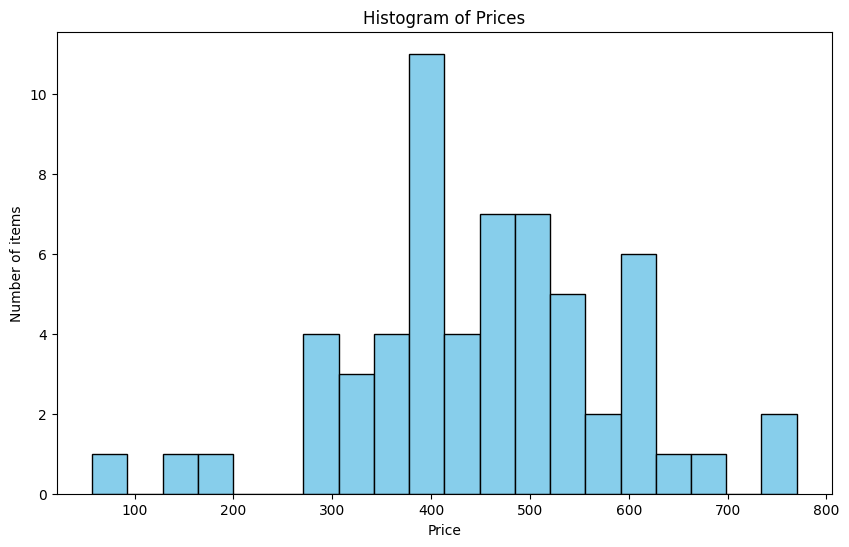

In [62]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df["price"], bins=20, color="skyblue", edgecolor="black")
plt.xlabel("Price")
plt.ylabel("Number of items")
plt.title("Histogram of Prices")
plt.show()


# II BeautifulSoup4


In [63]:
from bs4 import BeautifulSoup
from lxml import etree

In [64]:
soup = BeautifulSoup(driver.page_source, "html.parser")

result_container = soup.select_one("ul.srp-results.srp-list.clearfix")

result_container

<ul class="srp-results srp-list clearfix"><li class="s-card s-card--horizontal s-card--dark-solt-links-blue" data-listingid="167927485916" data-view="mi:1686|iid:1" data-viewport='{"trackableId":"01KB2J9WG5CW9HDNGKZM5GM3X7"}' id="item27194215dc"><div class="su-card-container su-card-container--horizontal"><div class="su-card-container__media"><div class="s-card__media-wrapper"><div class="su-media su-media--image"><div class="su-media__primary"><div class="su-media__image"><a _sp="p2351460.m1686.l7400" class="s-card__link image-treatment" data-interactions='[{"actionKind":"NAVSRC","interaction":"wwFVrK2vRE0lhQY0MDFLQjJKOVdIOTUxSk1UNFpCOEpIUDlBWFo0MDFLQjJKOVdITUNZNlgzVDlaUUo4OEhYVlE0MDFLQjJKOVdHNUNXOUhETkdLWk01R00zWDcAAAg3NDAwDE5BVlNSQwA="}]' data-s-1c3x832='{"eventFamily":"LST","eventAction":"ACTN","actionKind":"NAVSRC","actionKinds":["NAVSRC"],"operationId":"2351460","flushImmediately":false,"eventProperty":{"$l":"2314906999558475"}}' href="https://www.ebay.com/itm/167927485916?_skw=g

In [69]:
# Let's wrap it all in a function


def get_item_data_bs4(item):
    return {
        "title": item.select_one("span.su-styled-text.primary.default").get_text(strip=True) if item.select_one("span.su-styled-text.primary.default") else "",
        "price": item.select_one("span.s-card__price").get_text(strip=True) if item.select_one("span.s-card__price") else "",
        "link": item.select_one("div.su-media__image a")["href"] if item.select_one("div.su-media__image a") else "",
    }


data2 = []

for item in result_container.select("li.s-card"):
    data2.append(get_item_data_bs4(item))
data2

[{'title': 'Galaxy S25 FE',
  'price': '$360.00',
  'link': 'https://www.ebay.com/itm/167927485916?_skw=galaxy+s25&epid=16085673539&itmmeta=01KB2J9WG5CW9HDNGKZM5GM3X7&hash=item27194215dc:g:9WUAAeSwfI1pFpY-&itmprp=enc%3AAQAKAAAA4FkggFvd1GGDu0w3yXCmi1eBARZmwpsdwX2AcUTVyJ22%2BwkIo2qW1iEsAXh9R5e%2BRPi8x6RVYmi8MPuDSia17prMIETVKyvMSc4yNDwT%2B%2BkxKkRcOLoarqxY6uEGF1xgzBR4EfYeY2ldLNVA7TFA1z%2Fde0tcj09921%2BM%2FiOxWqb4vYl%2B7fIxZE5Bqj6fikob0DpsIlK12tz6b6JNqx3nkhdqurVD5F9obYOwixDklKzG%2B%2B%2BiDaDB3PZwWeL4J1drc8EPyBoliKzEhIWTbgcpGrdcNbqvn5KvRLy%2FS3OMaGs8%7Ctkp%3ABFBMmMin0thm'},
 {'title': 'Samsung Galaxy S25 SM-S931U1 - 128GB - Navy (Carrier Unlocked)',
  'price': '$449.98',
  'link': 'https://www.ebay.com/itm/157247319124?_skw=galaxy+s25&epid=28074871612&itmmeta=01KB2J9WG5QBY87F9H56AA5ZVH&hash=item249cabac54:g:E1kAAeSw9QNon6f~&itmprp=enc%3AAQAKAAAA4FkggFvd1GGDu0w3yXCmi1ejCklXjZRiohjtU6ZULXP834DDuTcUlw5fQCJGpmFfQ0qOf5j%2BsLIOZaxHhi7TBEQyLKFnyo20xqEACBLD04rUImwGp3%2F6GvQ25vj76TR6ndIMlAFCyUJ5xEyP

In [ ]:
df2 = pd.DataFrame(data2)
df2.price = df2.price.str.replace("$", "")
df2.price = df2.price.str.replace(",", "")
df2 = df2[df2["price"] != ""]
df2.price = df2.price.astype(float)
df2.sort_values(by="price", ascending=False, inplace=True)
# df2['memory'] = df2.title.str.
df2

,title,price,link
43,SEALED Mint Samsung Galaxy S25 Plus 256GB Unlo...,769.95,https://www.ebay.com/itm/157455592302?_skw=gal...
16,Carrier Unlocked Samsung Galaxy S25 Ultra 256G...,750.99,https://www.ebay.com/itm/277496972927?_skw=gal...
54,"Samsung Galaxy S25 Edge 512GB Unlocked 6.7"" SM...",696.99,https://www.ebay.com/itm/205876820269?_skw=gal...
40,Samsung Galaxy S25 (SM-S931W) - 256GB Unlocked...,640.84,https://www.ebay.com/itm/389287133404?_skw=gal...
10,Samsung Galaxy s25 128gb Navy Blue SM-S931B/DS,626.12,https://www.ebay.com/itm/127444184510?_skw=gal...
41,Samsung Galaxy S25+ SM-S936U1 Unlocked 256GB P...,609.99,https://www.ebay.com/itm/197177963650?_skw=gal...
7,Samsung Galaxy S25 Edge 512GB - Titanium Jet B...,599.99,https://www.ebay.com/itm/205623408557?_skw=gal...
55,Samsung Galaxy S25 Edge - 512 GB - Titanium Je...,599.99,https://www.ebay.com/itm/205623410620?_skw=gal...
42,Samsung Galaxy S25+ - SM-S926U - 512 GB - Navy...,599.95,https://www.ebay.com/itm/187780833277?_skw=gal...
6,✨ NEW IN BOX Samsung Galaxy S25 5G 128GB IcyBl...,599.00,https://www.ebay.com/itm/187753501882?_skw=gal...


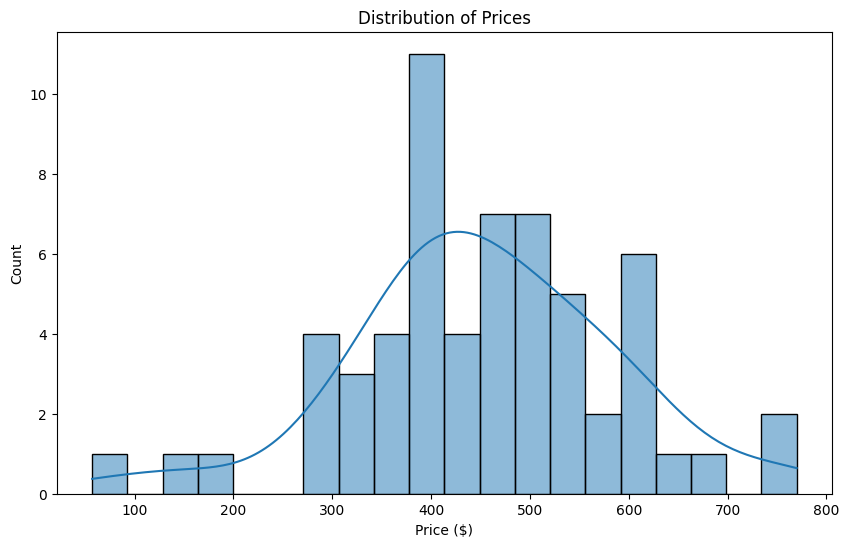

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.histplot(df2.price, bins=20, kde=True)
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title("Distribution of Prices")
plt.show()


# REST API


| Code range | Category             |
| ---------- | -------------------- |
| 2xx        | Successful operation |
| 3xx        | Redirection          |
| 4xx        | Client error         |
| 5xx        | Server error         |


| Code | Meaning                | Description                                                                    |
| ---- | ---------------------- | ------------------------------------------------------------------------------ |
| 200  | OK                     | The requested action was successful.                                           |
| 201  | Created                | A new resource was created.                                                    |
| 202  | Accepted               | The request was received, but no modification has been made yet.               |
| 204  | No Content             | The request was successful, but the response has no content.                   |
| 400  | Bad Request            | The request was malformed.                                                     |
| 401  | Unauthorized           | The client is not authorized to perform the requested action.                  |
| 404  | Not Found              | The requested resource was not found.                                          |
| 415  | Unsupported Media Type | The request data format is not supported by the server.                        |
| 422  | Unprocessable Entity   | The request data was properly formatted but contained invalid or missing data. |
| 500  | Internal Server Error  | The server threw an error when processing the request.                         |


| HTTP method | API endpoint             | Description                  |
| ----------- | ------------------------ | ---------------------------- |
| GET         | /customers               | Get a list of customers.     |
| GET         | /customers/<customer_id> | Get a single customer.       |
| POST        | /customers               | Create a new customer.       |
| PUT         | /customers/<customer_id> | Update a customer.           |
| PATCH       | /customers/<customer_id> | Partially update a customer. |
| DELETE      | /customers/<customer_id> | Delete a customer.           |


Get current bitcoin price

Try using https://www.coindesk.com/price/bitcoin/


In [ ]:
import requests

headers = {
    "authority": "production.api.coindesk.com",
    "method": "GET",
    "path": "/v2/tb/price/ticker?assets=BTC,ETH,XRP,BCH,EOS,XLM,LTC,ADA,XMR,DASH,IOTA,TRX,NEO,ETC,XEM,ZEC,BTG,LSK,QTUM,BSV,DOGE,DCR,USDT,USDC,LINK,XTZ,ZRX,DAI,BAT,OXT,ALGO,ATOM,KNC,OMG,ANT,REP,BAND,BTT,MANA,FET,ICX,KAVA,LRC,MKR,MLN,NANO,NMR,PAXG,USDP,SC,STORJ,WAVES,FIL,CVC,DNT,REN,BNT,WBTC,GRT,UNI,DOT,YFI,AAVE,NU,MATIC,AMP,CELO,COMP,CRV,RLC,KSM,NKN,SHIB,SKL,SNX,LUNC,UMA,ICP,SOL,AVAX,UST,ENJ,IOTX,AXS,XYO,SUSHI,ANKR,CHZ,LPT,COTI,KEEP,SAND,GALA,APE,CRO,ACHP,JASMY,REQ,SLP,NEAR,MBOX,POLIS,MOVR,POLS,QUICK,MINA,IMX,XEC,NEXO,RUNE,QNT,VET,CAKE,BNB,THETA,HBAR,FTM,RVN,ZIL,DGB,FTT,ENS,WRX,WAXP,EGLD,BUSD,CEL,OP,LUNA,RAY,FLOW,AUDIO,ROSE,CKB,VGX,YGG,CHR,STMX,SXP,INJ,JOE,POLY,STX,SFP,FARM,XVG,CLV,WOO,GLMR,STEEM,RARE,IDEX,SRM,PYR,MIR,SYS,ALPACA,QSP,SCRT,SUN,APT,MASK,DYDX,LDO,CVX,GMT,CTSI,METIS,FORTH,RBN,SAMO,SPELL,SNGLS",
    "scheme": "https",
    "accept": "application/json, text/plain, */*",
    "accept-encoding": "gzip, deflate, br",
    "accept-language": "en-US,en;q=0.7",
    "origin": "https://www.coindesk.com",
    "referer": "https://www.coindesk.com/",
    "sec-ch-ua": '"Not_A Brand";v="99", "Brave";v="109", "Chromium";v="109"',
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-platform": "Windows",
    "sec-fetch-dest": "empty",
    "sec-fetch-mode": "cors",
    "sec-fetch-site": "same-site",
    "sec-gpc": "1",
    "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/109.0.0.0 Safari/537.36",
}

payload = {
    "assets": "BTC,ETH,XRP,BCH,EOS,XLM,LTC,ADA,XMR,DASH,IOTA,TRX,NEO,ETC,XEM,ZEC,BTG,LSK,QTUM,BSV,DOGE,DCR,USDT,USDC,LINK,XTZ,ZRX,DAI,BAT,OXT,ALGO,ATOM,KNC,OMG,ANT,REP,BAND,BTT,MANA,FET,ICX,KAVA,LRC,MKR,MLN,NANO,NMR,PAXG,USDP,SC,STORJ,WAVES,FIL,CVC,DNT,REN,BNT,WBTC,GRT,UNI,DOT,YFI,AAVE,NU,MATIC,AMP,CELO,COMP,CRV,RLC,KSM,NKN,SHIB,SKL,SNX,LUNC,UMA,ICP,SOL,AVAX,UST,ENJ,IOTX,AXS,XYO,SUSHI,ANKR,CHZ,LPT,COTI,KEEP,SAND,GALA,APE,CRO,ACHP,JASMY,REQ,SLP,NEAR,MBOX,POLIS,MOVR,POLS,QUICK,MINA,IMX,XEC,NEXO,RUNE,QNT,VET,CAKE,BNB,THETA,HBAR,FTM,RVN,ZIL,DGB,FTT,ENS,WRX,WAXP,EGLD,BUSD,CEL,OP,LUNA,RAY,FLOW,AUDIO,ROSE,CKB,VGX,YGG,CHR,STMX,SXP,INJ,JOE,POLY,STX,SFP,FARM,XVG,CLV,WOO,GLMR,STEEM,RARE,IDEX,SRM,PYR,MIR,SYS,ALPACA,QSP,SCRT,SUN,APT,MASK,DYDX,LDO,CVX,GMT,CTSI,METIS,FORTH,RBN,SAMO,SPELL,SNGLS"
}

r = requests.get("https://production.api.coindesk.com/v2/tb/price/ticker", headers=headers, params=payload)
r

In [ ]:
data = r.json()
data["data"]
iso = []
name = []
change_pct = []
change_value = []
o = []
h = []
l = []
c = []

for ticker, values in data["data"].items():
    iso.append(values["iso"])
    name.append(values["name"])
    change_pct.append(values["change"]["percent"])
    change_value.append(values["change"]["value"])
    o.append(values["ohlc"]["o"])
    h.append(values["ohlc"]["h"])
    l.append(values["ohlc"]["l"])
    c.append(values["ohlc"]["c"])

In [ ]:
import pandas as pd

df = pd.DataFrame({"iso": iso, "name": name, "change_pct": change_pct, "change_value": change_pct, "change_value": change_value, "o": o, "h": h, "l": l, "c": c})
df

,iso,name,change_pct,change_value,o,h,l,c
0,BTC,Bitcoin,0.243394,73.586560,30233.500000,30404.395226,30062.163693,30307.086560
1,ETH,Ethereum,0.614224,11.423270,1859.788509,1878.550000,1843.987016,1871.211779
2,XRP,XRP,0.414337,0.001937,0.467465,0.474807,0.467023,0.469402
3,BCH,Bitcoin Cash,0.328407,0.880000,267.960000,279.060000,262.161789,268.840000
4,EOS,EOS,1.642100,0.011869,0.722794,0.748700,0.706700,0.734663
...,...,...,...,...,...,...,...,...
168,FORTH,Ampleforth Governance Token,-0.499481,-0.012909,2.584548,2.610078,2.557029,2.571638
169,RBN,Ribbon Finance,0.115695,0.000213,0.184210,0.186508,0.183794,0.184423
170,SAMO,Samoyedcoin,-0.412152,-0.000016,0.003828,0.003828,0.003710,0.003812
171,SPELL,Spell Token,-1.051684,-0.000005,0.000473,0.000474,0.000461,0.000468


<AxesSubplot: >

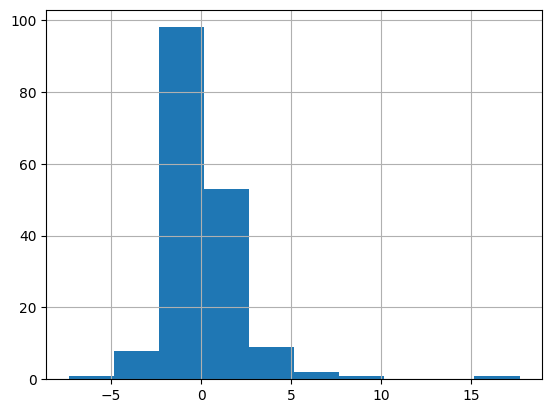

In [48]:
df.change_pct.hist()

In [49]:
df.loc[df.change_pct == df.change_pct.min()]

,iso,name,change_pct,change_value,o,h,l,c
107,XEC,eCash,-7.354113,-0.000003,0.000036,0.000036,0.000033,0.000033


In [50]:
df.loc[df.change_pct == df.change_pct.max()]

,iso,name,change_pct,change_value,o,h,l,c
167,METIS,MetisDAO,17.680823,2.785629,15.755088,18.600914,14.8347,18.540717
